# Responsi

Pada responsi saya akan menggunakan data hasil crawling saya dengan topik Metaverse, data tersebut akan diolah dengan model klasifikasi dengan naive bayes yang menghasilkan analisis sentimen dari topik metaverse

## Text Preprocessing

Text preprocessing sendiri merupakan tahapan preprocessing dengan data text agar data tersebut menjadi data yang siap untuk diolah/dianalisis, ada beberapa tahapan text preprocessing yaitu:
* Data Cleaning/Filtering
* Case Folding
* Tokenization
* Stopword removal
* Normalization
* Stemming

Sebelumnya untuk mengelola data tersebut kita perlu memanggil library sebagai berikut: 

In [1]:
import pandas as pd 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#memanggil data crawling 
data = pd.read_excel('/Users/LENOVO/Documents/DatMin/Crawling_Twitter/crawling_twitter2.xlsx')
data.head()

,Text,Created-At,From-User,Source,Id
0,Jual karya NFT mu di platform $WSPP dengan bia...,2021-12-21 14:52:24,Mbah Mijan,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1473199662190325763
1,"Wakil Ketua Komisi I DPR RI, Anton S. Suratto,...",2021-12-21 14:05:00,Partai Demokrat,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1473187731299733507
2,Bonus demografi Indonesia masih aja rame menun...,2021-12-19 14:14:32,Eno | Social Media Strategist,"<a href=""http://twitter.com/download/android"" ...",1472465356471996416
3,KomediRetjeh Tolong lah udh mau 2022 masih aja...,2021-12-22 11:02:56,SHE ??,"<a href=""http://twitter.com/download/android"" ...",1473504301511106568
4,$CYBERCASH NFT $CCASH METAVERSE https://t.c...,2021-12-22 11:01:31,Sabse pahle DESH KI BAAT 100% Followback,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1473503945146265603


In [3]:
#Melakukan slicing untuk mengambil atribut Text
df = pd.DataFrame(data['Text'], columns=["Text"])
df

,Text
0,Jual karya NFT mu di platform $WSPP dengan bia...
1,"Wakil Ketua Komisi I DPR RI, Anton S. Suratto,..."
2,Bonus demografi Indonesia masih aja rame menun...
3,KomediRetjeh Tolong lah udh mau 2022 masih aja...
4,$CYBERCASH NFT $CCASH METAVERSE https://t.c...
...,...
255,Wadidaw makin hot aja nih era metaverse ilmu k...
256,WayanAriasa8: Review Dare NFT - Project NFT 2...
257,metaverse seru ya
258,Review Dare NFT - Project NFT 2.0 untuk Memasu...


Hasil setelah melakukan case folding yaitu semua huruf kapital pada atribute Text(Tweet) berubah menjadi huruf kecil. Selanjutnya akan melakukan tokenization untuk membuat kalimat pada tweet menjadi potongan kata tunggal

## Data Cleaning/Filtering

Pada tahap ini dilakukan dengan menghapus string seperti @namapengguna, situs web, gambar, dan simbol seperti tanda baca koma (,), titik (.), tanda seru (!), tanda tanya (?) dan sebagainya; numerik (0).

In [4]:
#Melakukan data cleaning untuk membersihkan text dari tab, hastag, link,dll
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

#data cleaning 
def clean(text):
    # tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    #incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
       
#mendeklarasikan fungsi 
df['Text'] = df['Text'].apply(clean)

#menampilkan df
df

,Text
0,Jual karya NFT mu di platform $WSPP dengan bia...
1,"Wakil Ketua Komisi I DPR RI, Anton S. Suratto,..."
2,Bonus demografi Indonesia masih aja rame menun...
3,KomediRetjeh Tolong lah udh mau 2022 masih aja...
4,$CYBERCASH NFT $CCASH METAVERSE
...,...
255,Wadidaw makin hot aja nih era metaverse ilmu k...
256,WayanAriasa8: Review Dare NFT - Project NFT 2....
257,metaverse seru ya
258,Review Dare NFT - Project NFT 2.0 untuk Memasu...


In [5]:
#menghapus nomor/angka pada data 
def clean_num(text):
    return  re.sub(r"\d+", "", text)

df['Text'] = df['Text'].apply(clean_num)
df

,Text
0,Jual karya NFT mu di platform $WSPP dengan bia...
1,"Wakil Ketua Komisi I DPR RI, Anton S. Suratto,..."
2,Bonus demografi Indonesia masih aja rame menun...
3,KomediRetjeh Tolong lah udh mau masih aja per...
4,$CYBERCASH NFT $CCASH METAVERSE
...,...
255,Wadidaw makin hot aja nih era metaverse ilmu k...
256,WayanAriasa: Review Dare NFT - Project NFT . u...
257,metaverse seru ya
258,Review Dare NFT - Project NFT . untuk Memasuki...


In [6]:
#Menghapus tanda baca
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['Text'] = df['Text'].apply(remove_punctuation)
df

,Text
0,Jual karya NFT mu di platform WSPP dengan biay...
1,Wakil Ketua Komisi I DPR RI Anton S Suratto me...
2,Bonus demografi Indonesia masih aja rame menun...
3,KomediRetjeh Tolong lah udh mau masih aja per...
4,CYBERCASH NFT CCASH METAVERSE
...,...
255,Wadidaw makin hot aja nih era metaverse ilmu k...
256,WayanAriasa Review Dare NFT Project NFT untu...
257,metaverse seru ya
258,Review Dare NFT Project NFT untuk Memasuki E...


In [7]:
#Menghilangkan whitespace
def remove_whitespace_LT(text):
    return text.strip()

df['Text'] = df['Text'].apply(remove_whitespace_LT)

#Menghilangkan multiple whitespace menjadi single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['Text'] = df['Text'].apply(remove_whitespace_multiple)
df

,Text
0,Jual karya NFT mu di platform WSPP dengan biay...
1,Wakil Ketua Komisi I DPR RI Anton S Suratto me...
2,Bonus demografi Indonesia masih aja rame menun...
3,KomediRetjeh Tolong lah udh mau masih aja perc...
4,CYBERCASH NFT CCASH METAVERSE
...,...
255,Wadidaw makin hot aja nih era metaverse ilmu k...
256,WayanAriasa Review Dare NFT Project NFT untuk ...
257,metaverse seru ya
258,Review Dare NFT Project NFT untuk Memasuki Era...


In [8]:
#Menghilangkan emoji
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
df['Text'] = df['Text'].apply(deEmojify)
df

,Text
0,Jual karya NFT mu di platform WSPP dengan biay...
1,Wakil Ketua Komisi I DPR RI Anton S Suratto me...
2,Bonus demografi Indonesia masih aja rame menun...
3,KomediRetjeh Tolong lah udh mau masih aja perc...
4,CYBERCASH NFT CCASH METAVERSE
...,...
255,Wadidaw makin hot aja nih era metaverse ilmu k...
256,WayanAriasa Review Dare NFT Project NFT untuk ...
257,metaverse seru ya
258,Review Dare NFT Project NFT untuk Memasuki Era...


In [9]:
# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['Text'] = df['Text'].apply(remove_singl_char)
df


,Text
0,Jual karya NFT mu di platform WSPP dengan biay...
1,Wakil Ketua Komisi DPR RI Anton Suratto memi...
2,Bonus demografi Indonesia masih aja rame menun...
3,KomediRetjeh Tolong lah udh mau masih aja perc...
4,CYBERCASH NFT CCASH METAVERSE
...,...
255,Wadidaw makin hot aja nih era metaverse ilmu k...
256,WayanAriasa Review Dare NFT Project NFT untuk ...
257,metaverse seru ya
258,Review Dare NFT Project NFT untuk Memasuki Era...


## Case Folding

Case folding adalah mengubah semua huruf kapital pada tweet menjadi huruf kecil. Berikut contoh dari case folding

In [10]:
#case folding
df['Text'] = df['Text'].str.lower()
df

,Text
0,jual karya nft mu di platform wspp dengan biay...
1,wakil ketua komisi dpr ri anton suratto memi...
2,bonus demografi indonesia masih aja rame menun...
3,komediretjeh tolong lah udh mau masih aja perc...
4,cybercash nft ccash metaverse
...,...
255,wadidaw makin hot aja nih era metaverse ilmu k...
256,wayanariasa review dare nft project nft untuk ...
257,metaverse seru ya
258,review dare nft project nft untuk memasuki era...


## Tokenization

Tokenisasi adalah proses pembagian kata berdasarkan tiap kata yang menyusunnya menjadi potongan tunggal

In [11]:
# NLTK word tokenize 
import nltk
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['Tokenize'] = df['Text'].apply(word_tokenize_wrapper)
df

,Text,Tokenize
0,jual karya nft mu di platform wspp dengan biay...,"[jual, karya, nft, mu, di, platform, wspp, den..."
1,wakil ketua komisi dpr ri anton suratto memi...,"[wakil, ketua, komisi, dpr, ri, anton, suratto..."
2,bonus demografi indonesia masih aja rame menun...,"[bonus, demografi, indonesia, masih, aja, rame..."
3,komediretjeh tolong lah udh mau masih aja perc...,"[komediretjeh, tolong, lah, udh, mau, masih, a..."
4,cybercash nft ccash metaverse,"[cybercash, nft, ccash, metaverse]"
...,...,...
255,wadidaw makin hot aja nih era metaverse ilmu k...,"[wadidaw, makin, hot, aja, nih, era, metaverse..."
256,wayanariasa review dare nft project nft untuk ...,"[wayanariasa, review, dare, nft, project, nft,..."
257,metaverse seru ya,"[metaverse, seru, ya]"
258,review dare nft project nft untuk memasuki era...,"[review, dare, nft, project, nft, untuk, memas..."


In [12]:
#Freqdist untuk mendapatkan informasi frekuensi kemunculan setiap token

# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)
df['Frequensi'] = df['Tokenize'].apply(freqDist_wrapper)

 
df['Frequensi']= df['Frequensi'].apply(lambda x : x.most_common())
df

,Text,Tokenize,Frequensi
0,jual karya nft mu di platform wspp dengan biay...,"[jual, karya, nft, mu, di, platform, wspp, den...","[(karya, 2), (nft, 2), (wspp, 2), (jual, 1), (..."
1,wakil ketua komisi dpr ri anton suratto memi...,"[wakil, ketua, komisi, dpr, ri, anton, suratto...","[(wakil, 1), (ketua, 1), (komisi, 1), (dpr, 1)..."
2,bonus demografi indonesia masih aja rame menun...,"[bonus, demografi, indonesia, masih, aja, rame...","[(dan, 2), (bonus, 1), (demografi, 1), (indone..."
3,komediretjeh tolong lah udh mau masih aja perc...,"[komediretjeh, tolong, lah, udh, mau, masih, a...","[(udh, 2), (org, 2), (komediretjeh, 1), (tolon..."
4,cybercash nft ccash metaverse,"[cybercash, nft, ccash, metaverse]","[(cybercash, 1), (nft, 1), (ccash, 1), (metave..."
...,...,...,...
255,wadidaw makin hot aja nih era metaverse ilmu k...,"[wadidaw, makin, hot, aja, nih, era, metaverse...","[(wadidaw, 1), (makin, 1), (hot, 1), (aja, 1),..."
256,wayanariasa review dare nft project nft untuk ...,"[wayanariasa, review, dare, nft, project, nft,...","[(nft, 2), (wayanariasa, 1), (review, 1), (dar..."
257,metaverse seru ya,"[metaverse, seru, ya]","[(metaverse, 1), (seru, 1), (ya, 1)]"
258,review dare nft project nft untuk memasuki era...,"[review, dare, nft, project, nft, untuk, memas...","[(nft, 2), (review, 1), (dare, 1), (project, 1..."


## stopword removal

Tahap stopword removal merupakan proses mengambil kata-kata penting dari hasil tokenisasi dan menghilangkan kata yang tidak sesuai dengan topik dokumen, dikarenakan kata tersebut tidak mempengaruhi akurasi dalam klasifikasi sentimen.

In [13]:
from nltk.corpus import stopwords

# get stopword indonesia
list_stopwords = stopwords.words('indonesian')

# stopword tambahan
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah','bak','haii'])



In [14]:
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)



In [15]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]
df['stopw'] = df['Tokenize'].apply(stopwords_removal) 


df

,Text,Tokenize,Frequensi,stopw
0,jual karya nft mu di platform wspp dengan biay...,"[jual, karya, nft, mu, di, platform, wspp, den...","[(karya, 2), (nft, 2), (wspp, 2), (jual, 1), (...","[jual, karya, nft, mu, platform, wspp, biaya, ..."
1,wakil ketua komisi dpr ri anton suratto memi...,"[wakil, ketua, komisi, dpr, ri, anton, suratto...","[(wakil, 1), (ketua, 1), (komisi, 1), (dpr, 1)...","[wakil, ketua, komisi, dpr, ri, anton, suratto..."
2,bonus demografi indonesia masih aja rame menun...,"[bonus, demografi, indonesia, masih, aja, rame...","[(dan, 2), (bonus, 1), (demografi, 1), (indone...","[bonus, demografi, indonesia, rame, sikapnya, ..."
3,komediretjeh tolong lah udh mau masih aja perc...,"[komediretjeh, tolong, lah, udh, mau, masih, a...","[(udh, 2), (org, 2), (komediretjeh, 1), (tolon...","[komediretjeh, tolong, udh, percaya, gini, udh..."
4,cybercash nft ccash metaverse,"[cybercash, nft, ccash, metaverse]","[(cybercash, 1), (nft, 1), (ccash, 1), (metave...","[cybercash, nft, ccash, metaverse]"
...,...,...,...,...
255,wadidaw makin hot aja nih era metaverse ilmu k...,"[wadidaw, makin, hot, aja, nih, era, metaverse...","[(wadidaw, 1), (makin, 1), (hot, 1), (aja, 1),...","[wadidaw, hot, era, metaverse, ilmu, diupgrade..."
256,wayanariasa review dare nft project nft untuk ...,"[wayanariasa, review, dare, nft, project, nft,...","[(nft, 2), (wayanariasa, 1), (review, 1), (dar...","[wayanariasa, review, dare, nft, project, nft,..."
257,metaverse seru ya,"[metaverse, seru, ya]","[(metaverse, 1), (seru, 1), (ya, 1)]","[metaverse, seru]"
258,review dare nft project nft untuk memasuki era...,"[review, dare, nft, project, nft, untuk, memas...","[(nft, 2), (review, 1), (dare, 1), (project, 1...","[review, dare, nft, project, nft, memasuki, er..."


## Normalization

Normalisasi yang dimaksud yaitu mengganti kata – kata yang tidak baku menjadi baku. Pada proses ini menggunakan dataset kamus-alay.

In [16]:
normalizad_word = pd.read_excel("Normalisasi.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df['normal'] = df['stopw'].apply(normalized_term)

df

,Text,Tokenize,Frequensi,stopw,normal
0,jual karya nft mu di platform wspp dengan biay...,"[jual, karya, nft, mu, di, platform, wspp, den...","[(karya, 2), (nft, 2), (wspp, 2), (jual, 1), (...","[jual, karya, nft, mu, platform, wspp, biaya, ...","[jual, karya, nft, mu, platform, wspp, biaya, ..."
1,wakil ketua komisi dpr ri anton suratto memi...,"[wakil, ketua, komisi, dpr, ri, anton, suratto...","[(wakil, 1), (ketua, 1), (komisi, 1), (dpr, 1)...","[wakil, ketua, komisi, dpr, ri, anton, suratto...","[wakil, ketua, komisi, dpr, ri, anton, suratto..."
2,bonus demografi indonesia masih aja rame menun...,"[bonus, demografi, indonesia, masih, aja, rame...","[(dan, 2), (bonus, 1), (demografi, 1), (indone...","[bonus, demografi, indonesia, rame, sikapnya, ...","[bonus, demografi, indonesia, rame, sikapnya, ..."
3,komediretjeh tolong lah udh mau masih aja perc...,"[komediretjeh, tolong, lah, udh, mau, masih, a...","[(udh, 2), (org, 2), (komediretjeh, 1), (tolon...","[komediretjeh, tolong, udh, percaya, gini, udh...","[komediretjeh, tolong, udh, percaya, gini, udh..."
4,cybercash nft ccash metaverse,"[cybercash, nft, ccash, metaverse]","[(cybercash, 1), (nft, 1), (ccash, 1), (metave...","[cybercash, nft, ccash, metaverse]","[cybercash, nft, ccash, metaverse]"
...,...,...,...,...,...
255,wadidaw makin hot aja nih era metaverse ilmu k...,"[wadidaw, makin, hot, aja, nih, era, metaverse...","[(wadidaw, 1), (makin, 1), (hot, 1), (aja, 1),...","[wadidaw, hot, era, metaverse, ilmu, diupgrade...","[wadidaw, hot, era, metaverse, ilmu, diupgrade..."
256,wayanariasa review dare nft project nft untuk ...,"[wayanariasa, review, dare, nft, project, nft,...","[(nft, 2), (wayanariasa, 1), (review, 1), (dar...","[wayanariasa, review, dare, nft, project, nft,...","[wayanariasa, review, dare, nft, project, nft,..."
257,metaverse seru ya,"[metaverse, seru, ya]","[(metaverse, 1), (seru, 1), (ya, 1)]","[metaverse, seru]","[metaverse, seru]"
258,review dare nft project nft untuk memasuki era...,"[review, dare, nft, project, nft, untuk, memas...","[(nft, 2), (review, 1), (dare, 1), (project, 1...","[review, dare, nft, project, nft, memasuki, er...","[review, dare, nft, project, nft, memasuki, er..."


## Stemming

stemming adalah proses mengubah bentuk kata menjadi kata dasar, dengan dilakukanya proses ini setiap kata berimbuhan akan berubah menjadi kata dasar sehingga dapat lebih mengoptimalkan proses teks mining.

Untuk stemming saya akan menggunakan library sastrawi yang merupakan library sederhana yang dapat mengubah kata berimbuhan bahasa Indonesia menjadi bentuk dasarnya

In [17]:
#Memanggil library sastrawi 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['normal']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['steem'] = df['normal'].swifter.apply(get_stemmed_term)
df

1056
------------------------
jual : jual
karya : karya
nft : nft
mu : mu
platform : platform
wspp : wspp
biaya : biaya
rp : rp
ribu : ribu
rupiah : rupiah
terbaikmu : baik
tentukan : tentu
harganya : harga
robowolf : robowolf
fianby : fianby
wolfible : wolfible
wolfiland : wolfiland
metaverse : metaverse
wakil : wakil
ketua : ketua
komisi : komisi
dpr : dpr
ri : ri
anton : anton
suratto : suratto
kominfo : kominfo
pemerataan : perata
internet : internet
listrik : listrik
salah : salah
solusi : solusi
tantangan : tantang
pengembangan : kembang
indonesia : indonesia
simak : simak
argumennya : argumen
bonus : bonus
demografi : demografi
rame : rame
sikapnya : sikap
menghadapi : hadap
blockchain : blockchain
web : web
civilization : civilization
type : type
komediretjeh : komediretjeh
tolong : tolong
udh : udh
percaya : percaya
gini : gin
bahas : bahas
parahhhhh : parahhhhh
netnot : netnot
cybercash : cybercash
ccash : ccash
benstihat : benstihat
kekurangan : kurang
kelebihan : lebih
comm

ginian : ginian
nggak : nggak
ktp : ktp
fotokopi : fotokopi
bscsolanamtkmetakingmetaverse : bscsolanamtkmetakingmetaverse
krmtroysuryo : krmtroysuryo
dukung : dukung
society : society
ur : ur
skrng : skrng
idol : idol
walah : walah
plis : plis
cepat : cepat
diriku : diri
blum : blum
belajar : ajar
omaigad : omaigad
omiagad : omiagad
pekerjalab : pekerjalab
geus : geus
mimitian : mimitian
kedeung : kedeung
deui : deui
pemkab : pemkab
kbb : kbb
seminar : seminar
pelayanan : layan
administrasi : administrasi
kota : kota
behnama : behnama
javadsa : javadsa
soheilmousavi : soheilmousavi
metaversecoin : metaversecoin
cosmeritchel : cosmeritchel
vanduc : vanduc
tuanngo : tuanngo
sunset : sunset
xfbedcedbecfdaffadabcdadafdcb : xfbedcedbecfdaffadabcdadafdcb
check : check
out : out
review : review
video : video
darenft : darenft
dreamboatid : dreamboatid
excited : excited
menyambut : sambut
dreamboat : dreamboat
dnft : dnft
futuristsmy : futuristsmy
nofutur : nofutur
maya : maya
fizikal : fizika

metaverstoken : metaverstoken
future : future
arockiab : arockiab
pavi : pavi
divyarame : divyarame
xcfdfadffdfccbed : xcfdfadffdfccbed
elon : elon
musk : musk
sibuk : sibuk
mobil : mobil
ngimpi : ngimpi
difokusin : difokusin
pembangunan : bangun
manusianya : manusia
pendidikan : didik
kentut : kentut
data : data
dijual : jual
negeri : negeri
ngurusin : ngurusin
keamanan : aman
cyber : cyber
dibanyakin : dibanyakin
buzzerudah : buzzerudah
sehat : sehat
negaranya : negara
wkkwk : wkkwk
xrpcommunity : xrpcommunity
bscgems : bscgems
sampe : sampe
gereja : gereja
dipersulit : sulit
boker : boker
epic : epic
games : games
mengumumkan : umum
publik : publik
mendanai : dana
miliar : miliar
dolar : dolar
untu : untu
seorangkhairul : seorangkhairul
melawat : lawat
galeri : galeri
seni : seni
malam : malam
newsantara : newsantara
cant : cant
wait : wait
see : see
this : this
detiktoken : detiktoken
dtk : dtk
bincangcrypto : bincangcrypto
kejadian : jadi
originatorx : originatorx
smkg : smkg
crea

Pandas Apply:   0%|          | 0/260 [00:00<?, ?it/s]

,Text,Tokenize,Frequensi,stopw,normal,steem
0,jual karya nft mu di platform wspp dengan biay...,"[jual, karya, nft, mu, di, platform, wspp, den...","[(karya, 2), (nft, 2), (wspp, 2), (jual, 1), (...","[jual, karya, nft, mu, platform, wspp, biaya, ...","[jual, karya, nft, mu, platform, wspp, biaya, ...","[jual, karya, nft, mu, platform, wspp, biaya, ..."
1,wakil ketua komisi dpr ri anton suratto memi...,"[wakil, ketua, komisi, dpr, ri, anton, suratto...","[(wakil, 1), (ketua, 1), (komisi, 1), (dpr, 1)...","[wakil, ketua, komisi, dpr, ri, anton, suratto...","[wakil, ketua, komisi, dpr, ri, anton, suratto...","[wakil, ketua, komisi, dpr, ri, anton, suratto..."
2,bonus demografi indonesia masih aja rame menun...,"[bonus, demografi, indonesia, masih, aja, rame...","[(dan, 2), (bonus, 1), (demografi, 1), (indone...","[bonus, demografi, indonesia, rame, sikapnya, ...","[bonus, demografi, indonesia, rame, sikapnya, ...","[bonus, demografi, indonesia, rame, sikap, had..."
3,komediretjeh tolong lah udh mau masih aja perc...,"[komediretjeh, tolong, lah, udh, mau, masih, a...","[(udh, 2), (org, 2), (komediretjeh, 1), (tolon...","[komediretjeh, tolong, udh, percaya, gini, udh...","[komediretjeh, tolong, udh, percaya, gini, udh...","[komediretjeh, tolong, udh, percaya, gin, udh,..."
4,cybercash nft ccash metaverse,"[cybercash, nft, ccash, metaverse]","[(cybercash, 1), (nft, 1), (ccash, 1), (metave...","[cybercash, nft, ccash, metaverse]","[cybercash, nft, ccash, metaverse]","[cybercash, nft, ccash, metaverse]"
...,...,...,...,...,...,...
255,wadidaw makin hot aja nih era metaverse ilmu k...,"[wadidaw, makin, hot, aja, nih, era, metaverse...","[(wadidaw, 1), (makin, 1), (hot, 1), (aja, 1),...","[wadidaw, hot, era, metaverse, ilmu, diupgrade...","[wadidaw, hot, era, metaverse, ilmu, diupgrade...","[wadidaw, hot, era, metaverse, ilmu, diupgrade..."
256,wayanariasa review dare nft project nft untuk ...,"[wayanariasa, review, dare, nft, project, nft,...","[(nft, 2), (wayanariasa, 1), (review, 1), (dar...","[wayanariasa, review, dare, nft, project, nft,...","[wayanariasa, review, dare, nft, project, nft,...","[wayanariasa, review, dare, nft, project, nft,..."
257,metaverse seru ya,"[metaverse, seru, ya]","[(metaverse, 1), (seru, 1), (ya, 1)]","[metaverse, seru]","[metaverse, seru]","[metaverse, seru]"
258,review dare nft project nft untuk memasuki era...,"[review, dare, nft, project, nft, untuk, memas...","[(nft, 2), (review, 1), (dare, 1), (project, 1...","[review, dare, nft, project, nft, memasuki, er...","[review, dare, nft, project, nft, memasuki, er...","[review, dare, nft, project, nft, pasuk, era, ..."


## Visualisasi data

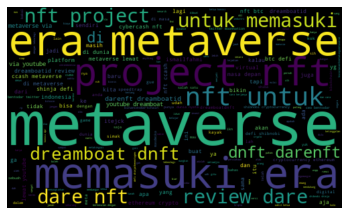

In [18]:
#Memvisualisasikan data 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# plot the word cloud 
allWord = ' '.join([twts for twts in df['Text']])
#sekarang kita akan memanggil verbal word cloud
wordCloud = WordCloud(width = 500,height=300, random_state=21, max_font_size=119).generate(allWord)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

## Modeling data

In [19]:
from textblob import TextBlob
#mendeklarasikan subjektif
def getSubject(text):
    return TextBlob(text).sentiment.subjectivity

#mendeklarasikan Polarity
def getPola(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Text'].apply(getSubject)
df['Polarity'] = df['Text'].apply(getPola)
df

,Text,Tokenize,Frequensi,stopw,normal,steem,Subjectivity,Polarity
0,jual karya nft mu di platform wspp dengan biay...,"[jual, karya, nft, mu, di, platform, wspp, den...","[(karya, 2), (nft, 2), (wspp, 2), (jual, 1), (...","[jual, karya, nft, mu, platform, wspp, biaya, ...","[jual, karya, nft, mu, platform, wspp, biaya, ...","[jual, karya, nft, mu, platform, wspp, biaya, ...",0.00,0.00
1,wakil ketua komisi dpr ri anton suratto memi...,"[wakil, ketua, komisi, dpr, ri, anton, suratto...","[(wakil, 1), (ketua, 1), (komisi, 1), (dpr, 1)...","[wakil, ketua, komisi, dpr, ri, anton, suratto...","[wakil, ketua, komisi, dpr, ri, anton, suratto...","[wakil, ketua, komisi, dpr, ri, anton, suratto...",0.00,0.00
2,bonus demografi indonesia masih aja rame menun...,"[bonus, demografi, indonesia, masih, aja, rame...","[(dan, 2), (bonus, 1), (demografi, 1), (indone...","[bonus, demografi, indonesia, rame, sikapnya, ...","[bonus, demografi, indonesia, rame, sikapnya, ...","[bonus, demografi, indonesia, rame, sikap, had...",0.00,0.00
3,komediretjeh tolong lah udh mau masih aja perc...,"[komediretjeh, tolong, lah, udh, mau, masih, a...","[(udh, 2), (org, 2), (komediretjeh, 1), (tolon...","[komediretjeh, tolong, udh, percaya, gini, udh...","[komediretjeh, tolong, udh, percaya, gini, udh...","[komediretjeh, tolong, udh, percaya, gin, udh,...",0.00,0.00
4,cybercash nft ccash metaverse,"[cybercash, nft, ccash, metaverse]","[(cybercash, 1), (nft, 1), (ccash, 1), (metave...","[cybercash, nft, ccash, metaverse]","[cybercash, nft, ccash, metaverse]","[cybercash, nft, ccash, metaverse]",0.00,0.00
...,...,...,...,...,...,...,...,...
255,wadidaw makin hot aja nih era metaverse ilmu k...,"[wadidaw, makin, hot, aja, nih, era, metaverse...","[(wadidaw, 1), (makin, 1), (hot, 1), (aja, 1),...","[wadidaw, hot, era, metaverse, ilmu, diupgrade...","[wadidaw, hot, era, metaverse, ilmu, diupgrade...","[wadidaw, hot, era, metaverse, ilmu, diupgrade...",0.85,0.25
256,wayanariasa review dare nft project nft untuk ...,"[wayanariasa, review, dare, nft, project, nft,...","[(nft, 2), (wayanariasa, 1), (review, 1), (dar...","[wayanariasa, review, dare, nft, project, nft,...","[wayanariasa, review, dare, nft, project, nft,...","[wayanariasa, review, dare, nft, project, nft,...",0.00,0.00
257,metaverse seru ya,"[metaverse, seru, ya]","[(metaverse, 1), (seru, 1), (ya, 1)]","[metaverse, seru]","[metaverse, seru]","[metaverse, seru]",0.00,0.00
258,review dare nft project nft untuk memasuki era...,"[review, dare, nft, project, nft, untuk, memas...","[(nft, 2), (review, 1), (dare, 1), (project, 1...","[review, dare, nft, project, nft, memasuki, er...","[review, dare, nft, project, nft, memasuki, er...","[review, dare, nft, project, nft, pasuk, era, ...",0.00,0.00


In [20]:
# create a function to compute negative, neutral and positive analysis
def getAnalisis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analisis'] = df['Polarity'].apply(getAnalisis)
df

,Text,Tokenize,Frequensi,stopw,normal,steem,Subjectivity,Polarity,Analisis
0,jual karya nft mu di platform wspp dengan biay...,"[jual, karya, nft, mu, di, platform, wspp, den...","[(karya, 2), (nft, 2), (wspp, 2), (jual, 1), (...","[jual, karya, nft, mu, platform, wspp, biaya, ...","[jual, karya, nft, mu, platform, wspp, biaya, ...","[jual, karya, nft, mu, platform, wspp, biaya, ...",0.00,0.00,Neutral
1,wakil ketua komisi dpr ri anton suratto memi...,"[wakil, ketua, komisi, dpr, ri, anton, suratto...","[(wakil, 1), (ketua, 1), (komisi, 1), (dpr, 1)...","[wakil, ketua, komisi, dpr, ri, anton, suratto...","[wakil, ketua, komisi, dpr, ri, anton, suratto...","[wakil, ketua, komisi, dpr, ri, anton, suratto...",0.00,0.00,Neutral
2,bonus demografi indonesia masih aja rame menun...,"[bonus, demografi, indonesia, masih, aja, rame...","[(dan, 2), (bonus, 1), (demografi, 1), (indone...","[bonus, demografi, indonesia, rame, sikapnya, ...","[bonus, demografi, indonesia, rame, sikapnya, ...","[bonus, demografi, indonesia, rame, sikap, had...",0.00,0.00,Neutral
3,komediretjeh tolong lah udh mau masih aja perc...,"[komediretjeh, tolong, lah, udh, mau, masih, a...","[(udh, 2), (org, 2), (komediretjeh, 1), (tolon...","[komediretjeh, tolong, udh, percaya, gini, udh...","[komediretjeh, tolong, udh, percaya, gini, udh...","[komediretjeh, tolong, udh, percaya, gin, udh,...",0.00,0.00,Neutral
4,cybercash nft ccash metaverse,"[cybercash, nft, ccash, metaverse]","[(cybercash, 1), (nft, 1), (ccash, 1), (metave...","[cybercash, nft, ccash, metaverse]","[cybercash, nft, ccash, metaverse]","[cybercash, nft, ccash, metaverse]",0.00,0.00,Neutral
...,...,...,...,...,...,...,...,...,...
255,wadidaw makin hot aja nih era metaverse ilmu k...,"[wadidaw, makin, hot, aja, nih, era, metaverse...","[(wadidaw, 1), (makin, 1), (hot, 1), (aja, 1),...","[wadidaw, hot, era, metaverse, ilmu, diupgrade...","[wadidaw, hot, era, metaverse, ilmu, diupgrade...","[wadidaw, hot, era, metaverse, ilmu, diupgrade...",0.85,0.25,Positive
256,wayanariasa review dare nft project nft untuk ...,"[wayanariasa, review, dare, nft, project, nft,...","[(nft, 2), (wayanariasa, 1), (review, 1), (dar...","[wayanariasa, review, dare, nft, project, nft,...","[wayanariasa, review, dare, nft, project, nft,...","[wayanariasa, review, dare, nft, project, nft,...",0.00,0.00,Neutral
257,metaverse seru ya,"[metaverse, seru, ya]","[(metaverse, 1), (seru, 1), (ya, 1)]","[metaverse, seru]","[metaverse, seru]","[metaverse, seru]",0.00,0.00,Neutral
258,review dare nft project nft untuk memasuki era...,"[review, dare, nft, project, nft, untuk, memas...","[(nft, 2), (review, 1), (dare, 1), (project, 1...","[review, dare, nft, project, nft, memasuki, er...","[review, dare, nft, project, nft, memasuki, er...","[review, dare, nft, project, nft, pasuk, era, ...",0.00,0.00,Neutral


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim 


bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=500,stop_words='english')
bow = bow_vectorizer.fit_transform(df['Text']) # tokenize and build vocabulary
bow.shape

(260, 402)

In [22]:
#spliting data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df['Analisis'],
                                                    test_size=0.2, random_state=69)

In [23]:
#melakukan klasifikasi naive bayes
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier
model_naive = MultinomialNB().fit(X_train, y_train) 

#membuat prediksi dengan data testing
prediksi_naive = model_naive.predict(X_test)

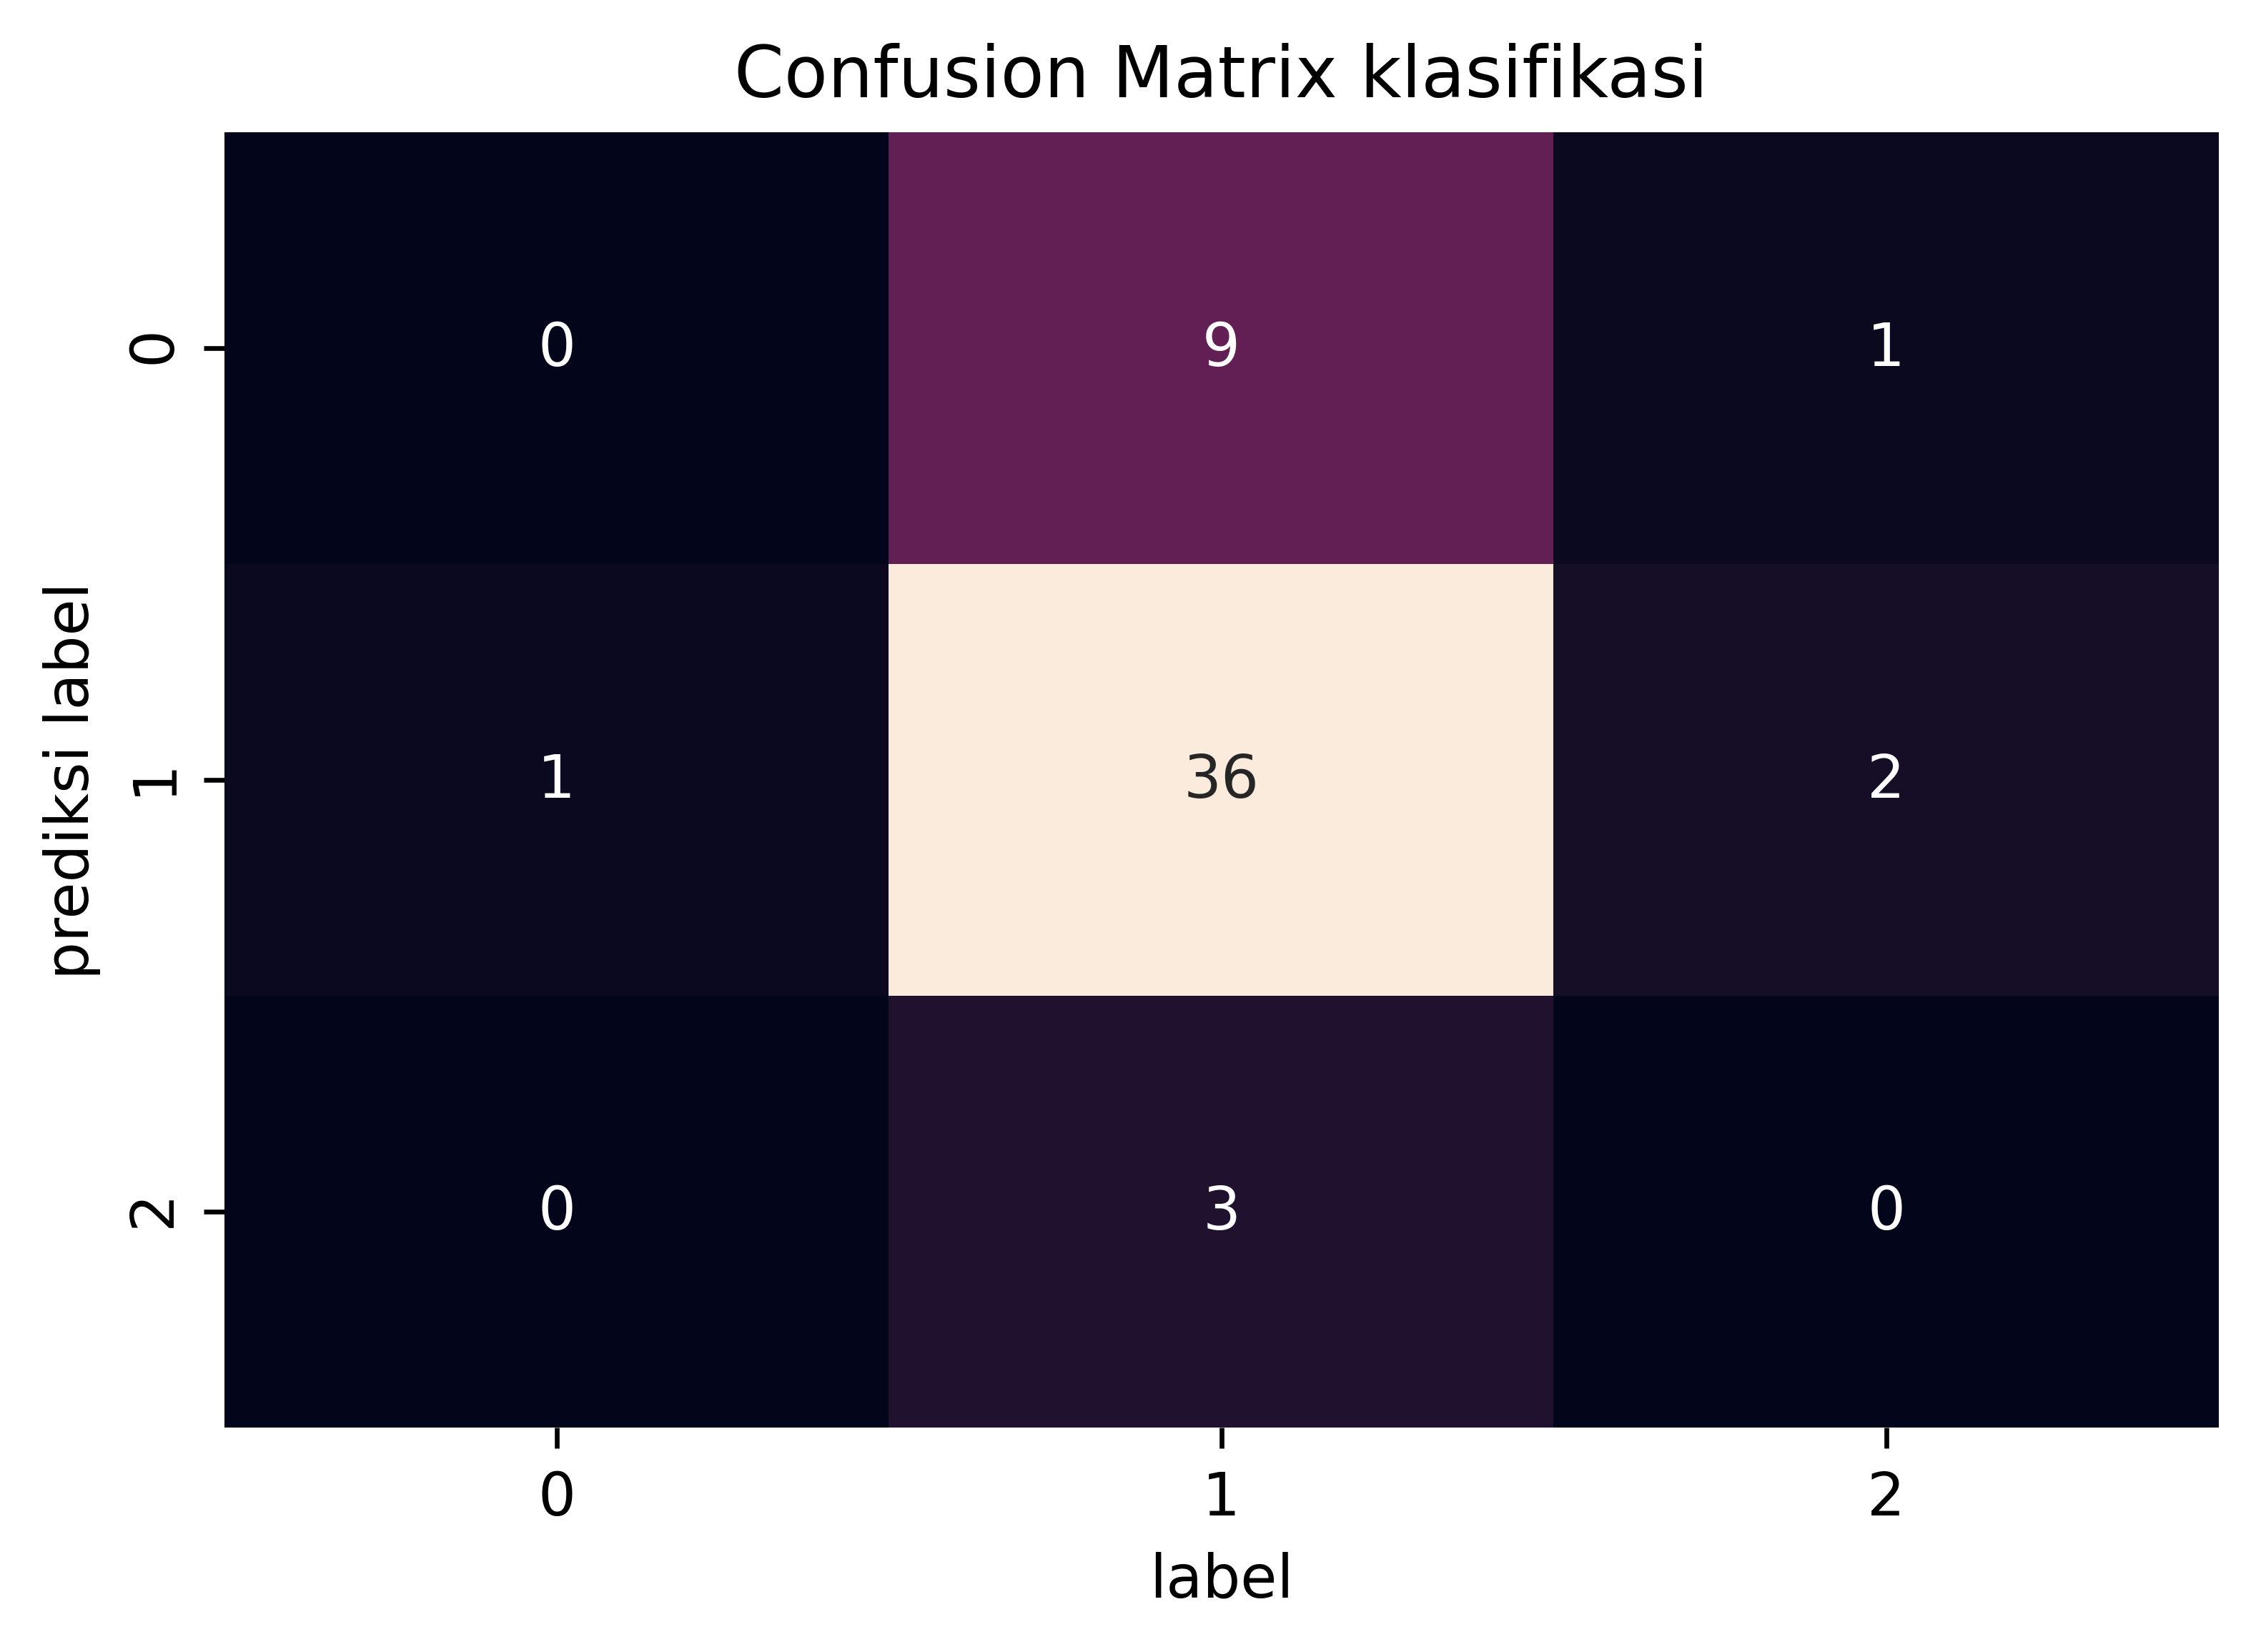

In [24]:
#visualisasi data confusion matrix dengan heatmap 
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, prediksi_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix klasifikasi')
plt.xlabel('label')
plt.ylabel('prediksi label')
plt.savefig("cm.png")
plt.show()

In [27]:
#Evaluasi hasil klasifikasi 
from sklearn.metrics import accuracy_score, classification_report

score_naive = accuracy_score(prediksi_naive, y_test)
print(classification_report(y_test, prediksi_naive))
print("Akurasi Naive Bayes: ",score_naive)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.92      0.75      0.83        48
    Positive       0.00      0.00      0.00         3

    accuracy                           0.69        52
   macro avg       0.31      0.25      0.28        52
weighted avg       0.85      0.69      0.76        52

Akurasi Naive Bayes:  0.6923076923076923
